In [1]:
import math
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import pandas as pd
import sympy as sp

sp.init_printing()


In [2]:
from pylib import doubling_search


In [3]:
nbm.print_metadata()


context: ci
hostname: b108a0077748
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 3
nbname: estimating_popsize
nbpath: /opt/hereditary-stratigraph-concept/binder/derivations/estimating_popsize.ipynb
revision: null
session: b6271cf9-dd37-4e0c-8a7d-b44bcd5f49e0
timestamp: 2022-01-31T00:49:48Z00:00


IPython==7.16.1
keyname==0.4.1
yaml==5.3.1
matplotlib==3.3.2
nbmetalog==0.2.6
pandas==1.1.2
sympy==1.5.1
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.3.0
json==2.0.9
six==1.16.0
ipykernel==5.5.3


Suppose we have a population of $n$ individuals.
Each individual has one gene: an unsigned integer of fixed precision (i.e., 32 bits, 64 bits, etc.).
At outset, suppose each individual begins with gene value drawn from a uniform distribution over possible gene values.
Then, let generations elapse with sexual recombination between individuals.

If we enforce a "gene drive" mechanism where offspring inherit the larger of their parents' genes, the largest gene value in the population will eventually reach fixation.

Introduce a random variable $\mathbb{X}$ to represent the the magnitude of the gene value observed after fixation.
How is $\mathbb{X}$ distributed?

If we approximate our unsigned gene as uniformly distributed between 0 and 1, it turns out to be distributed as

$$
\mathrm{Beta}(n, 1)
$$

[(Gentle, 2008)](gentle2008computational) [via Wikipedia](https://en.wikipedia.org/wiki/Order_statistic#:~:text=Order%20statistics%20sampled%20from%20a%20uniform%20distribution%5Bedit%5D>).

This probability density function of this distribution can be given as

$$
n x^{n-1}
$$

for $x$ on $[0,1]$ and 0 otherwise.



Extend our thought experiment to $k$ independent genes, where each gene has the same fixed precision, is initialized uniformly, is inherited entirely independently from all other genes, and independently enforces the "gene drive" mechanism as before.

Suppose we sample an individual from the population after all genes goes to fixation.
If we observe values of $k$ fixed genes, how can we estimate the size of the population the individual was extracted from?



Let us use the method of maximum likelihood estimation to determine the most likely value of $n$ given an observation of $k$ gene values after fixation.

Denote the likelihood of a population size $n$ given our observations as $\mathcal{L}(n|\mathbb{X}_0=x_0, \dots, \mathbb{X}_k=x_k)$ or $\mathcal{L}$ for short.
Because our observations are independent, we can calculate likelihood as a product of probability densities,

$\begin{align*}
\mathcal{L}
&= \prod_{i=1}^k n x_i^{n-1}.
\end{align*}$

Applying a logarithmic transformation for convenience,

$\begin{align*}
\log\mathcal{L}
&= \sum_{i=1}^k \log( n x_i^{n-1} ) \\
&= (n-1) \sum_{i=1}^k \log( x_i ) + k \log(n)
\end{align*}$



To maximize $\log\mathcal{L}$ with respect to $n$, solve for $n$ where $\frac{\mathrm{d}}{\mathrm{d}n}\log\mathcal{L} = 0$,

$\begin{align*}
0
&= \frac{\mathrm{d}}{\mathrm{d}n}\log\mathcal{L} \\
&= \frac{\mathrm{d}}{\mathrm{d}n} \Big( (n-1) \sum_{i=1}^k \log( x_i ) + k \log(n) \Big)\\
&= \sum_{i=1}^k \log( x_i ) + k/n\\
-k/n &= \sum_{i=1}^k \log( x_i )\\
-k &= n\sum_{i=1}^k \log( x_i )\\
n &= -\frac{k}{\sum_{i=1}^k \log( x_i )}.
\end{align*}$

Note that $\forall i$, $x_i \leq 1$ so $\log( x_i ) \leq 0$ and $\sum_{i=1}^k \log( x_i ) \leq 0$.



To check that $n = -\frac{k}{\sum_{i=1}^k \log( x_i )}$ maximizes $\log\mathcal{L}$ rather than minimizing it, we must show that \frac{\mathrm{d}^2}{\mathrm{d}n^2} < 0 at this point.

$\begin{align*}
0 &\stackrel{?}{>} \frac{\mathrm{d}^2}{\mathrm{d}n^2} \log\mathcal{L}|_{n = -\frac{k}{\sum_{i=1}^k \log( x_i )}}\\
&\stackrel{?}{>} \frac{\mathrm{d}}{\mathrm{d}n} \sum_{i=1}^k \log( x_i ) + k n^{-1} |_{n = -\frac{k}{\sum_{i=1}^k \log( x_i )}}\\
&\stackrel{?}{>} -kn^{-2} |_{n = -\frac{k}{\sum_{i=1}^k \log( x_i )}}\\
&\stackrel{?}{>} -k/n^{2} |_{n = -\frac{k}{\sum_{i=1}^k \log( x_i )}}\\
&\stackrel{?}{>} -k\\
&\stackrel{?}{<} k.
\end{align*}$

Because $k$ is our count of 1 or more replicate observations, we have $0 \stackrel{\checkmark}{<} k$.



We now have a maximum likelihood estimate $\hat{n}_\mathrm{mle}$ for $n$.

In order to better understand our estimate, we should develop an expression for uncertainty related to the estimate.
We can express probability that the true value of $n$ falls within a range as the fraction of total likelihood that falls within that range.
This constitutes a Bayesian ``credible interval,'' which differs subtly from a (frequentist) confidence interval [(Porter, 1996)](porder1996interval).
Note that this assumes a uniform prior for $n$ over $\mathbb{R}_{\ge 0}$.



To begin, calculate total likelihood $L$ by integrating over the domain of $n$.
(For simplicity, we treat $n$ as continuous rather than discrete.)

$\begin{align*}
L
&= \int_{0}^{\infty} \mathcal{L}(n) \, \mathrm{d}n \\
&= \int_{0}^{\infty} \exp(\log\mathcal{L}(n)) \, \mathrm{d}n \\
&= \int_{0}^{\infty} \exp\Big((n-1) \sum_{i=1}^k \log( x_i ) + k \log(n)\Big) \, \mathrm{d}n \\
&= \int_{0}^{\infty} \exp\Big((n-1) \sum_{i=1}^k \log( x_i )\Big) \exp\Big(k \log(n)\Big) \, \mathrm{d}n \\
&= \int_{0}^{\infty} \exp\Big((n-1) \sum_{i=1}^k \log( x_i )\Big) \exp\Big( \log(n^k)\Big) \, \mathrm{d}n \\
&= \int_{0}^{\infty} \exp\Big((n-1) \sum_{i=1}^k \log( x_i )\Big) n^k \, \mathrm{d}n.
\end{align*}$

Let's simplify our expression by substituting $\sum_{i=1}^k \log( x_i )$ as $v$,

$\begin{align*}
L
&= \int_{0}^{\infty} \exp\Big((n-1) v\Big) n^k \, \mathrm{d}n
\end{align*}$

and evaluate this integral with the help of computer algebra.


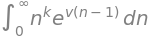

In [4]:
# specify variables with assumptions for domain
n = sp.Symbol('n', positive=True, real=True,)
k = sp.Symbol('k', integer=True, positive=True, real=True,)
v = sp.Symbol('v', negative=True, real=True,)

likelihood = sp.exp( (n-1) * v ) * n**k

# pretty print, does the expression look right?
sp.Integral(likelihood, (n, 0, sp.oo))


In [5]:
# perform integration
likelihood_integrated_over_domain = sp.integrate(likelihood, (n, 0, sp.oo))
likelihood_integrated_over_domain



Simplifying and substituting,

$\begin{align*}
L
&= -\frac{(-v)^{-k} e^{-v} \Gamma(k+1)}{v}\\
&= -\frac{-v(-v)^{-k-1} e^{-v} \Gamma(k+1)}{v}\\
&= (-v)^{-k-1} e^{-v} \Gamma(k+1).
\end{align*}$



How much likelihood $L_f$ falls within a factor $f$ of our maximum likelihood estimate?
Integrating likelihood $\mathcal{L}$ between $\hat{n}_\mathrm{mle}/f$ and $f\hat{n}_\mathrm{mle}$,

$\begin{align*}
L_f
&= \int_{\hat{n}_\mathrm{mle}/f}^{f\hat{n}_\mathrm{mle}} \mathcal{L}(n) \, \mathrm{d}n\\
&= \int_{\frac{1}{f}\frac{k}{-\sum_{i=1}^k \log( x_i )}}^{f\frac{k}{-\sum_{i=1}^k \log( x_i )}} \exp\Big((n-1) v\Big) n^k \, \mathrm{d}n.
\end{align*}$

Once more simplifying this expression by substituting $\sum_{i=1}^k \log( x_i )$ as $v$,

$\begin{align*}
L_f
&= \int_{\frac{k}{-fv}}^{\frac{fk}{-v}} \exp\Big((n-1) v\Big) n^k \, \mathrm{d}n.
\end{align*}$

we will again rely on computer algebra to evaluate this integral.


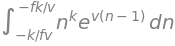

In [6]:
# specify variables with assumptions for domain
f = sp.Symbol('f', positive=True, real=True,)

credible_interval_lb = - k / (f * v)
credible_interval_ub = - f * k / v

# pretty print, does the expression look right?
sp.Integral(
    likelihood,
    (n, credible_interval_lb, credible_interval_ub,),
)


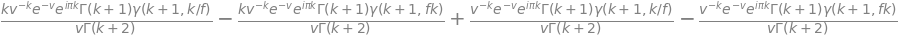

In [7]:
# perform integration
likelihood_integrated_over_credible_interval = sp.integrate(
    likelihood,
    (n, credible_interval_lb, credible_interval_ub,),
)
likelihood_integrated_over_credible_interval


In [8]:
# simplify resulit
likelihood_integrated_over_credible_interval.simplify()



We can now solve for the credibilty contained within the credible interval by taking the ratio of integrated likelihoods.


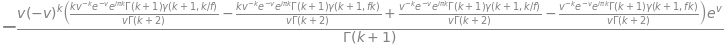

In [9]:
credibility = (
    likelihood_integrated_over_credible_interval
    / likelihood_integrated_over_domain
)
credibility


In [10]:
credibility = credibility.simplify()
credibility



Unfortunately, there is no easy rearrangement to analytically express the number of required independent observations $k$ in terms of the required credibility and the desired creditiblity interval width factor $f$.


In [11]:
# trying to solve for an expression that gives f
# which will yield 95% credibility fails
try:
    sp.solve(sp.Eq( credibility, 0.95 ), k)
except NotImplementedError as e:
    print(e)
    pass


multiple generators [factorial(k), lowergamma(k + 1, f*k), lowergamma(k + 1, k/f)]
No algorithms are implemented to solve equation (-lowergamma(k + 1, k/f) + lowergamma(k + 1, f*k))/factorial(k) - 19/20



However, we can nonetheless efficiently compute the number of required independent observations $k$ to capture a target credibility within a particular factor of the MLE by means of exponential search.


In [12]:
def num_observations_required_for_credibility(
    target_credibility: float,
    interval_factor: float,
) -> int:
    """
    Find the minimum number of observations required for a threshold amount of credibility to be contained within a factor of the MLE estimate for
    population size.

    Parameters
    ----------
    target_credibility : float
        What credibility is required for the credible interval?
    interval_factor : float
        What should the credible interval bounds be, as a factor of the MLE estimate?
        For instance, 2 would indicate the credible interval should span from half of the MLE estimate to twice the MLE estimate.
        Corresponds to $f$ in symbolic scratchwork elsewhere.
    upper_bound : int
        Upper bound for the binary search, inclusive.
    """

    assert 0.0 <= target_credibility <= 1.0
    assert interval_factor > 1.0

    predicate = lambda k_: credibility.evalf(
        subs={
            k : k_,
            f : interval_factor,
        },
    ) >= target_credibility

    return doubling_search( predicate )



How many independent observations are required to capture 95% of credibility for different credible interval sizes?


In [13]:
sampled_interval_factors = (
    1.1,
    1.5,
    2.0,
    3.0,
    4.0,
    6.0,
)
pd.DataFrame.from_records([
    {
        'Factor of MLE with 95% Credibility' : interval_factor,
        'Num Independent Observations Required' : num_observations_required_for_credibility(0.95, interval_factor),
    }
for interval_factor in sampled_interval_factors])


,Factor of MLE with 95% Credibility,Num Independent Observations Required
0,1.1,423
1,1.5,23
2,2.0,8
3,3.0,3
4,4.0,2
5,6.0,1


 References

[Gentle, James E. Computational statistics. Vol. 308. New York: Springer, 2009.](#gentle2008computational)

[Porter, Frank. "Interval estimation using the likelihood function." Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment 368.3 (1996): 793-803.](#porder1996interval)
